In [ ]:
# Add Barium to the proto-solar data
%pylab inline
list_of_elements = ['He','C', 'N', 'O', 'F','Ne','Na', 'Mg', 'Al', 'Si', 'P','S', 'Cl','Ar','K', 'Ca','Sc','Ti', 'V', 'Cr', 'Mn', 'Fe', 'Co', 'Ni','Cu','Zn','Ga','Ge','Ba']#, 'Zn','Y', 'Ba']# Runs with sun


In [ ]:
from Chempy.solar_abundance import solar_abundances
basic_solar = solar_abundances()
basic_solar.Asplund09()
age = 4.56
age_error = 0.01
scaled_abun = [] # Produce proto-solar abundance data for all elements (cut down later)
solar_err = []
for item in list_of_elements:
    if item =='He':
        scaled_abun.append(0.01)
    elif item =='Fe':
        scaled_abun.append(0.04)
    else:
        scaled_abun.append(0.)
    for i in range(len(basic_solar.table['Symbol'])):
        if basic_solar.table['Symbol'][i] == item:
            temp = basic_solar.table['error'][i]
            break
    solar_err.append(temp+0.01) # add correction for proto-solar data

In [ ]:
from Chempy.data_to_test import produce_wildcard_stellar_abundances

produce_wildcard_stellar_abundances(stellar_identifier = 'Proto-sun_Ba', 
                                     age_of_star = age,
                                     sigma_age = age_error,
                                     element_symbols = list_of_elements,
                                     element_abundances = scaled_abun,
                                     element_errors = solar_err)

In [ ]:
proto_sun_new = np.load('Proto-sun_Ba.npy')

In [ ]:
(proto_sun_new.dtype.names)

#### USING beta = 10**0.5 here (peak of Bayes distribution)

In [ ]:
# First run without including Ba
%pylab inline
from Chempy.wrapper import single_star_optimization
single_star_optimization()

In [2]:
%pylab inline
from Chempy.plot_mcmc import restructure_chain
restructure_chain('mcmc/')
positions = np.load('mcmc/posteriorPDF.npy') # Posterior parameter PDF


Populating the interactive namespace from numpy and matplotlib
blob shape =  (64, 303, 28, 1) probably some runs did not return results and were stored anyway.
The chain has a length of 303 iterations, each iteration having 64 evaluations/walkers
Mean posteriors at the beginning and the end of the chain:
-9.00603530397 -6.74018780782
Mean posteriors after the burn-in tail is cut out:
-9.00603530397 -9.08124046413
We are left with a sample of 4992 posterior evaluations from the converged MCMC chain
We have 4992 iterations good enough posterior, their posteriors range from
-6.69447112819 -18.3830619675
Highest posterior was obtained at parameters:  [[-2.3876211  -2.96690674 -0.30377074  0.56641321  0.47348862]]
Number of unique posterior values:  2844
Inferred marginalized parameter distributions are:
0 -2.32496661255 +- 0.148781620506
1 -2.90599720882 +- 0.188976606042
2 -0.279761729458 +- 0.277827215665
3 0.549095120287 +- 0.092353217292
4 0.492585825191 +- 0.103428686217


In [3]:
# Now add in Barium (in element_names, proto_sun_Ba, a.elements_to_trace)
# Turn OFF Neural network here also + run in parallel

In [15]:
from Chempy.parameter import ModelParameters
from Chempy.cem_function import posterior_function_returning_predictions
    
a = ModelParameters()
def element_predictor2(args):
    params,index = args
    index = int(index)
    preload = preload_params_mcmc()
    abun,_ = posterior_function_returning_predictions((params,a))
    output = abun[index]
    return output

In [16]:
%pylab inline

index=2
print('DO THE ABOVE FIRST!')
from Chempy.score_function import element_predictor
import multiprocessing as mp
import tqdm
p = mp.Pool()
indices = np.ones(len(positions))*index
abundance = list(tqdm.tqdm(p.imap_unordered(element_predictor2,zip(positions,indices)),total=len(positions)))
p.close()
p.join()


Populating the interactive namespace from numpy and matplotlib
DO THE ABOVE FIRST!


/home/philcox/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['indices']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"



  0%|          | 0/4992 [00:00<?, ?it/s]/home/philcox/anaconda3/lib/python3.6/site-packages/numpy/core/records.py:507: FutureWarning: Numpy has detected that you may be viewing or writing to an array returned by selecting multiple fields in a structured array. 

This code may break in numpy 1.13 because this will return a view instead of a copy -- see release notes for details.
  return obj.view(dtype=(self.dtype.type, obj.dtype))
/home/philcox/anaconda3/lib/python3.6/site-packages/numpy/core/records.py:507: FutureWarning: Numpy has detected that you may be viewing or writing to an array returned by selecting multiple fields in a structured array. 

This code may break in numpy 1.13 because this will return a view 

  2%|▏         | 97/4992 [01:08<1:00:42,  1.34it/s]


  2%|▏         | 99/4992 [01:08<44:58,  1.81it/s]  /home/philcox/Chempy/Chempy/time_integration.py:279: RuntimeWarning: invalid value encountered in double_scalars
  self.gas_reservoir['Z'][index] = self.gas_reservoir['Z'][index] / float(self.gas_reservoir['gas'][index])



  2%|▏         | 100/4992 [01:10<1:26:48,  1.06s/it]


  2%|▏         | 101/4992 [01:11<1:05:40,  1.24it/s]


  2%|▏         | 102/4992 [01:11<53:27,  1.52it/s]  


  2%|▏         | 104/4992 [01:13<1:04:44,  1.26it/s]


  2%|▏         | 105/4992 [01:13<47:56,  1.70it/s]  


  2%|▏         | 106/4992 [01:14<40:22,  2.02it/s]


  2%|▏         | 108/4992 [01:16<56:34,  1.44it/s]


  2%|▏         | 110/4992 [01:16<42:33,  1.91it/s]


  2%|▏         | 111/4992 [01:16<32:42,  2.49it/s]


  2%|▏         | 112/4992 [01:19<1:19:28,  1.02it/s]


  2%|▏         | 113/4992 [01:19<58:29,  1.39it/s]  


  2%|▏         | 115/4992 [01:19<42:39,  1.91it/s]


  2%|▏         | 116/

  5%|▍         | 245/4992 [02:46<53:35,  1.48it/s]  


  5%|▍         | 246/4992 [02:47<47:13,  1.68it/s]


  5%|▍         | 247/4992 [02:47<46:46,  1.69it/s]


  5%|▍         | 248/4992 [02:49<1:03:47,  1.24it/s]


  5%|▍         | 249/4992 [02:49<56:06,  1.41it/s]  


  5%|▌         | 250/4992 [02:49<44:42,  1.77it/s]


  5%|▌         | 251/4992 [02:50<48:15,  1.64it/s]


  5%|▌         | 252/4992 [02:51<1:01:50,  1.28it/s]


  5%|▌         | 253/4992 [02:52<56:20,  1.40it/s]  


  5%|▌         | 254/4992 [02:52<45:15,  1.75it/s]


  5%|▌         | 255/4992 [02:53<50:05,  1.58it/s]


  5%|▌         | 256/4992 [02:54<1:01:39,  1.28it/s]


  5%|▌         | 257/4992 [02:54<54:02,  1.46it/s]  


  5%|▌         | 258/4992 [02:55<45:08,  1.75it/s]


  5%|▌         | 259/4992 [02:56<49:10,  1.60it/s]


  5%|▌         | 260/4992 [02:57<1:03:23,  1.24it/s]


  5%|▌         | 261/4992 [02:57<51:22,  1.53it/s]  


  5%|▌         | 262/4992 [02:57<45:10,  1.75it/s]


  5%|▌         | 263/4992 [0

  8%|▊         | 379/4992 [04:16<53:31,  1.44it/s]


  8%|▊         | 380/4992 [04:17<57:30,  1.34it/s]


  8%|▊         | 381/4992 [04:17<55:18,  1.39it/s]


  8%|▊         | 383/4992 [04:19<53:00,  1.45it/s]


  8%|▊         | 384/4992 [04:19<54:27,  1.41it/s]


  8%|▊         | 385/4992 [04:20<53:07,  1.45it/s]


  8%|▊         | 387/4992 [04:21<52:35,  1.46it/s]


  8%|▊         | 388/4992 [04:22<50:49,  1.51it/s]


  8%|▊         | 389/4992 [04:23<49:40,  1.54it/s]


  8%|▊         | 390/4992 [04:23<38:27,  1.99it/s]


  8%|▊         | 391/4992 [04:24<57:33,  1.33it/s]


  8%|▊         | 392/4992 [04:25<52:36,  1.46it/s]


  8%|▊         | 393/4992 [04:25<50:15,  1.53it/s]


  8%|▊         | 394/4992 [04:25<38:58,  1.97it/s]


  8%|▊         | 395/4992 [04:27<58:22,  1.31it/s]


  8%|▊         | 396/4992 [04:27<54:03,  1.42it/s]


  8%|▊         | 397/4992 [04:28<50:11,  1.53it/s]


  8%|▊         | 398/4992 [04:28<38:07,  2.01it/s]


  8%|▊         | 399/4992 [04:29<58:31,  1.31i

 11%|█         | 528/4992 [05:55<51:56,  1.43it/s]  


 11%|█         | 529/4992 [05:55<39:12,  1.90it/s]


 11%|█         | 530/4992 [05:56<43:32,  1.71it/s]


 11%|█         | 531/4992 [05:58<1:07:12,  1.11it/s]


 11%|█         | 532/4992 [05:58<50:51,  1.46it/s]  


 11%|█         | 533/4992 [05:58<39:01,  1.90it/s]


 11%|█         | 534/4992 [05:59<40:38,  1.83it/s]


 11%|█         | 535/4992 [06:00<1:07:11,  1.11it/s]


 11%|█         | 536/4992 [06:01<50:34,  1.47it/s]  


 11%|█         | 537/4992 [06:01<39:32,  1.88it/s]


 11%|█         | 538/4992 [06:01<40:38,  1.83it/s]


 11%|█         | 539/4992 [06:03<1:06:31,  1.12it/s]


 11%|█         | 540/4992 [06:03<51:53,  1.43it/s]  


 11%|█         | 541/4992 [06:04<44:09,  1.68it/s]


 11%|█         | 542/4992 [06:04<43:51,  1.69it/s]


 11%|█         | 543/4992 [06:06<1:07:53,  1.09it/s]


 11%|█         | 544/4992 [06:06<50:58,  1.45it/s]  


 11%|█         | 545/4992 [06:07<49:20,  1.50it/s]


 11%|█         | 546/4992 [0

 13%|█▎        | 663/4992 [07:27<45:33,  1.58it/s]


 13%|█▎        | 664/4992 [07:28<1:05:48,  1.10it/s]


 13%|█▎        | 666/4992 [07:29<54:17,  1.33it/s]  


 13%|█▎        | 667/4992 [07:29<44:04,  1.64it/s]


 13%|█▎        | 668/4992 [07:31<1:05:02,  1.11it/s]


 13%|█▎        | 669/4992 [07:31<48:31,  1.48it/s]  


 13%|█▎        | 670/4992 [07:32<50:04,  1.44it/s]


 13%|█▎        | 671/4992 [07:32<38:27,  1.87it/s]


 13%|█▎        | 672/4992 [07:34<1:00:39,  1.19it/s]


 13%|█▎        | 673/4992 [07:34<44:48,  1.61it/s]  


 14%|█▎        | 674/4992 [07:35<51:17,  1.40it/s]


 14%|█▎        | 676/4992 [07:36<53:02,  1.36it/s]


 14%|█▎        | 678/4992 [07:37<48:59,  1.47it/s]


 14%|█▎        | 679/4992 [07:37<37:10,  1.93it/s]


 14%|█▎        | 680/4992 [07:39<56:40,  1.27it/s]


 14%|█▎        | 682/4992 [07:40<51:38,  1.39it/s]


 14%|█▎        | 683/4992 [07:40<39:39,  1.81it/s]


 14%|█▎        | 684/4992 [07:41<55:48,  1.29it/s]


 14%|█▎        | 686/4992 [07:43<5

 17%|█▋        | 829/4992 [09:18<51:59,  1.33it/s]


 17%|█▋        | 830/4992 [09:18<39:36,  1.75it/s]


 17%|█▋        | 832/4992 [09:20<47:33,  1.46it/s]


 17%|█▋        | 833/4992 [09:21<45:02,  1.54it/s]


 17%|█▋        | 834/4992 [09:21<35:01,  1.98it/s]


 17%|█▋        | 835/4992 [09:21<26:55,  2.57it/s]


 17%|█▋        | 836/4992 [09:23<56:16,  1.23it/s]


 17%|█▋        | 837/4992 [09:24<53:30,  1.29it/s]


 17%|█▋        | 838/4992 [09:24<40:07,  1.73it/s]


 17%|█▋        | 839/4992 [09:24<30:17,  2.29it/s]


 17%|█▋        | 840/4992 [09:25<57:09,  1.21it/s]


 17%|█▋        | 841/4992 [09:26<54:07,  1.28it/s]


 17%|█▋        | 842/4992 [09:26<41:38,  1.66it/s]


 17%|█▋        | 843/4992 [09:26<31:29,  2.20it/s]


 17%|█▋        | 844/4992 [09:28<58:46,  1.18it/s]


 17%|█▋        | 845/4992 [09:29<53:16,  1.30it/s]


 17%|█▋        | 846/4992 [09:29<41:27,  1.67it/s]


 17%|█▋        | 848/4992 [09:31<48:28,  1.42it/s]


 17%|█▋        | 849/4992 [09:31<45:28,  1.52i

 20%|█▉        | 984/4992 [11:02<1:03:56,  1.04it/s]


 20%|█▉        | 985/4992 [11:02<47:56,  1.39it/s]  


 20%|█▉        | 987/4992 [11:03<39:47,  1.68it/s]


 20%|█▉        | 988/4992 [11:04<1:04:44,  1.03it/s]


 20%|█▉        | 989/4992 [11:05<48:50,  1.37it/s]  


 20%|█▉        | 991/4992 [11:05<41:18,  1.61it/s]


 20%|█▉        | 992/4992 [11:07<1:02:03,  1.07it/s]


 20%|█▉        | 993/4992 [11:07<48:13,  1.38it/s]  


 20%|█▉        | 994/4992 [11:07<36:58,  1.80it/s]


 20%|█▉        | 995/4992 [11:08<37:50,  1.76it/s]


 20%|█▉        | 996/4992 [11:10<58:41,  1.13it/s]


 20%|█▉        | 997/4992 [11:10<46:23,  1.44it/s]


 20%|█▉        | 998/4992 [11:10<37:22,  1.78it/s]


 20%|██        | 999/4992 [11:11<37:09,  1.79it/s]


 20%|██        | 1000/4992 [11:12<57:46,  1.15it/s]


 20%|██        | 1001/4992 [11:12<45:28,  1.46it/s]


 20%|██        | 1002/4992 [11:13<38:35,  1.72it/s]


 20%|██        | 1003/4992 [11:13<36:17,  1.83it/s]


 20%|██        | 1004/4992 [11

 23%|██▎       | 1135/4992 [12:41<33:52,  1.90it/s]


 23%|██▎       | 1136/4992 [12:43<55:28,  1.16it/s]


 23%|██▎       | 1137/4992 [12:43<45:00,  1.43it/s]


 23%|██▎       | 1138/4992 [12:44<36:54,  1.74it/s]


 23%|██▎       | 1139/4992 [12:44<36:16,  1.77it/s]


 23%|██▎       | 1140/4992 [12:46<54:50,  1.17it/s]


 23%|██▎       | 1141/4992 [12:46<43:30,  1.48it/s]


 23%|██▎       | 1142/4992 [12:46<37:38,  1.70it/s]


 23%|██▎       | 1143/4992 [12:47<34:53,  1.84it/s]


 23%|██▎       | 1144/4992 [12:48<54:45,  1.17it/s]


 23%|██▎       | 1145/4992 [12:48<41:17,  1.55it/s]


 23%|██▎       | 1146/4992 [12:49<39:08,  1.64it/s]


 23%|██▎       | 1147/4992 [12:49<34:25,  1.86it/s]


 23%|██▎       | 1148/4992 [12:51<55:54,  1.15it/s]


 23%|██▎       | 1150/4992 [12:52<46:22,  1.38it/s]


 23%|██▎       | 1151/4992 [12:52<37:43,  1.70it/s]


 23%|██▎       | 1152/4992 [12:54<57:09,  1.12it/s]


 23%|██▎       | 1154/4992 [12:54<48:09,  1.33it/s]


 23%|██▎       | 1155/4992 [

 26%|██▌       | 1283/4992 [14:21<47:13,  1.31it/s]


 26%|██▌       | 1284/4992 [14:21<39:10,  1.58it/s]


 26%|██▌       | 1285/4992 [14:22<36:08,  1.71it/s]


 26%|██▌       | 1286/4992 [14:23<44:48,  1.38it/s]


 26%|██▌       | 1287/4992 [14:23<45:35,  1.35it/s]


 26%|██▌       | 1288/4992 [14:24<40:28,  1.53it/s]


 26%|██▌       | 1289/4992 [14:24<35:59,  1.71it/s]


 26%|██▌       | 1290/4992 [14:25<45:16,  1.36it/s]


 26%|██▌       | 1291/4992 [14:26<44:30,  1.39it/s]


 26%|██▌       | 1292/4992 [14:27<39:00,  1.58it/s]


 26%|██▌       | 1293/4992 [14:27<34:59,  1.76it/s]


 26%|██▌       | 1294/4992 [14:28<46:05,  1.34it/s]


 26%|██▌       | 1295/4992 [14:29<43:09,  1.43it/s]


 26%|██▌       | 1296/4992 [14:29<39:21,  1.57it/s]


 26%|██▌       | 1297/4992 [14:30<34:35,  1.78it/s]


 26%|██▌       | 1298/4992 [14:31<46:26,  1.33it/s]


 26%|██▌       | 1299/4992 [14:31<43:57,  1.40it/s]


 26%|██▌       | 1300/4992 [14:32<39:02,  1.58it/s]


 26%|██▌       | 1301/4992 [

 28%|██▊       | 1420/4992 [15:53<42:45,  1.39it/s]


 28%|██▊       | 1422/4992 [15:54<40:07,  1.48it/s]


 29%|██▊       | 1423/4992 [15:55<43:57,  1.35it/s]


 29%|██▊       | 1424/4992 [15:55<43:12,  1.38it/s]


 29%|██▊       | 1426/4992 [15:56<39:23,  1.51it/s]


 29%|██▊       | 1427/4992 [15:57<45:13,  1.31it/s]


 29%|██▊       | 1428/4992 [15:58<41:57,  1.42it/s]


 29%|██▊       | 1430/4992 [15:59<38:54,  1.53it/s]


 29%|██▊       | 1431/4992 [16:00<46:12,  1.28it/s]


 29%|██▊       | 1432/4992 [16:00<41:00,  1.45it/s]


 29%|██▊       | 1434/4992 [16:02<38:52,  1.53it/s]


 29%|██▊       | 1435/4992 [16:03<45:19,  1.31it/s]


 29%|██▉       | 1436/4992 [16:03<41:06,  1.44it/s]


 29%|██▉       | 1438/4992 [16:04<37:59,  1.56it/s]


 29%|██▉       | 1439/4992 [16:05<46:04,  1.29it/s]


 29%|██▉       | 1440/4992 [16:06<41:38,  1.42it/s]


 29%|██▉       | 1442/4992 [16:07<38:06,  1.55it/s]


 29%|██▉       | 1443/4992 [16:08<47:07,  1.26it/s]


 29%|██▉       | 1444/4992 [

 32%|███▏      | 1575/4992 [17:36<45:28,  1.25it/s]


 32%|███▏      | 1576/4992 [17:37<39:28,  1.44it/s]


 32%|███▏      | 1578/4992 [17:38<36:32,  1.56it/s]


 32%|███▏      | 1579/4992 [17:39<44:52,  1.27it/s]


 32%|███▏      | 1580/4992 [17:39<37:55,  1.50it/s]


 32%|███▏      | 1582/4992 [17:40<36:30,  1.56it/s]


 32%|███▏      | 1583/4992 [17:41<43:57,  1.29it/s]


 32%|███▏      | 1584/4992 [17:42<36:38,  1.55it/s]


 32%|███▏      | 1586/4992 [17:43<36:04,  1.57it/s]


 32%|███▏      | 1587/4992 [17:44<43:20,  1.31it/s]


 32%|███▏      | 1588/4992 [17:44<35:44,  1.59it/s]


 32%|███▏      | 1590/4992 [17:46<36:18,  1.56it/s]


 32%|███▏      | 1591/4992 [17:47<42:24,  1.34it/s]


 32%|███▏      | 1592/4992 [17:47<34:47,  1.63it/s]


 32%|███▏      | 1594/4992 [17:48<36:14,  1.56it/s]


 32%|███▏      | 1595/4992 [17:49<41:48,  1.35it/s]


 32%|███▏      | 1596/4992 [17:50<32:44,  1.73it/s]


 32%|███▏      | 1598/4992 [17:51<36:28,  1.55it/s]


 32%|███▏      | 1599/4992 [

 35%|███▍      | 1727/4992 [19:17<33:09,  1.64it/s]


 35%|███▍      | 1728/4992 [19:18<37:57,  1.43it/s]


 35%|███▍      | 1729/4992 [19:18<39:06,  1.39it/s]


 35%|███▍      | 1730/4992 [19:19<40:41,  1.34it/s]


 35%|███▍      | 1732/4992 [19:20<38:45,  1.40it/s]


 35%|███▍      | 1733/4992 [19:21<39:38,  1.37it/s]


 35%|███▍      | 1734/4992 [19:22<36:49,  1.47it/s]


 35%|███▍      | 1735/4992 [19:22<27:56,  1.94it/s]


 35%|███▍      | 1736/4992 [19:23<39:53,  1.36it/s]


 35%|███▍      | 1737/4992 [19:24<43:22,  1.25it/s]


 35%|███▍      | 1738/4992 [19:24<34:56,  1.55it/s]


 35%|███▍      | 1739/4992 [19:24<26:26,  2.05it/s]


 35%|███▍      | 1740/4992 [19:26<38:45,  1.40it/s]


 35%|███▍      | 1741/4992 [19:27<44:48,  1.21it/s]


 35%|███▍      | 1742/4992 [19:27<34:12,  1.58it/s]


 35%|███▍      | 1743/4992 [19:27<26:36,  2.04it/s]


 35%|███▍      | 1744/4992 [19:28<38:32,  1.40it/s]


 35%|███▍      | 1745/4992 [19:29<43:37,  1.24it/s]


 35%|███▍      | 1746/4992 [

 37%|███▋      | 1866/4992 [20:50<35:40,  1.46it/s]


 37%|███▋      | 1867/4992 [20:50<35:46,  1.46it/s]


 37%|███▋      | 1868/4992 [20:51<33:53,  1.54it/s]


 37%|███▋      | 1869/4992 [20:52<35:23,  1.47it/s]


 37%|███▋      | 1870/4992 [20:52<35:14,  1.48it/s]


 37%|███▋      | 1871/4992 [20:53<35:31,  1.46it/s]


 38%|███▊      | 1872/4992 [20:54<33:52,  1.53it/s]


 38%|███▊      | 1873/4992 [20:54<35:38,  1.46it/s]


 38%|███▊      | 1874/4992 [20:55<34:19,  1.51it/s]


 38%|███▊      | 1875/4992 [20:56<35:02,  1.48it/s]


 38%|███▊      | 1876/4992 [20:56<33:34,  1.55it/s]


 38%|███▊      | 1877/4992 [20:57<36:10,  1.43it/s]


 38%|███▊      | 1878/4992 [20:58<32:01,  1.62it/s]


 38%|███▊      | 1879/4992 [20:59<37:11,  1.40it/s]


 38%|███▊      | 1880/4992 [20:59<33:01,  1.57it/s]


 38%|███▊      | 1881/4992 [21:00<35:45,  1.45it/s]


 38%|███▊      | 1882/4992 [21:00<30:59,  1.67it/s]


 38%|███▊      | 1883/4992 [21:01<38:38,  1.34it/s]


 38%|███▊      | 1884/4992 [

 40%|████      | 2019/4992 [22:32<41:32,  1.19it/s]


 40%|████      | 2020/4992 [22:33<33:03,  1.50it/s]


 40%|████      | 2021/4992 [22:33<30:42,  1.61it/s]


 41%|████      | 2022/4992 [22:34<26:46,  1.85it/s]


 41%|████      | 2023/4992 [22:35<42:22,  1.17it/s]


 41%|████      | 2024/4992 [22:35<32:44,  1.51it/s]


 41%|████      | 2025/4992 [22:36<29:50,  1.66it/s]


 41%|████      | 2026/4992 [22:36<25:46,  1.92it/s]


 41%|████      | 2027/4992 [22:38<43:26,  1.14it/s]


 41%|████      | 2028/4992 [22:38<32:16,  1.53it/s]


 41%|████      | 2029/4992 [22:38<28:56,  1.71it/s]


 41%|████      | 2030/4992 [22:39<25:39,  1.92it/s]


 41%|████      | 2031/4992 [22:41<43:31,  1.13it/s]


 41%|████      | 2032/4992 [22:41<33:03,  1.49it/s]


 41%|████      | 2033/4992 [22:41<28:25,  1.74it/s]


 41%|████      | 2034/4992 [22:41<24:36,  2.00it/s]


 41%|████      | 2035/4992 [22:43<44:46,  1.10it/s]


 41%|████      | 2037/4992 [22:44<35:15,  1.40it/s]


 41%|████      | 2038/4992 [

 43%|████▎     | 2169/4992 [24:12<29:02,  1.62it/s]


 43%|████▎     | 2170/4992 [24:13<33:49,  1.39it/s]


 43%|████▎     | 2171/4992 [24:13<27:10,  1.73it/s]


 44%|████▎     | 2172/4992 [24:15<37:18,  1.26it/s]


 44%|████▎     | 2173/4992 [24:15<28:35,  1.64it/s]


 44%|████▎     | 2174/4992 [24:16<33:01,  1.42it/s]


 44%|████▎     | 2175/4992 [24:16<26:37,  1.76it/s]


 44%|████▎     | 2176/4992 [24:17<37:05,  1.27it/s]


 44%|████▎     | 2177/4992 [24:17<28:55,  1.62it/s]


 44%|████▎     | 2178/4992 [24:18<32:34,  1.44it/s]


 44%|████▎     | 2179/4992 [24:19<26:58,  1.74it/s]


 44%|████▎     | 2180/4992 [24:20<37:00,  1.27it/s]


 44%|████▎     | 2181/4992 [24:20<27:41,  1.69it/s]


 44%|████▎     | 2182/4992 [24:21<32:55,  1.42it/s]


 44%|████▎     | 2183/4992 [24:21<26:29,  1.77it/s]


 44%|████▍     | 2184/4992 [24:23<37:11,  1.26it/s]


 44%|████▍     | 2186/4992 [24:24<34:13,  1.37it/s]


 44%|████▍     | 2187/4992 [24:24<25:45,  1.81it/s]


 44%|████▍     | 2188/4992 [

 46%|████▋     | 2309/4992 [25:46<34:11,  1.31it/s]


 46%|████▋     | 2310/4992 [25:47<34:49,  1.28it/s]


 46%|████▋     | 2311/4992 [25:47<27:59,  1.60it/s]


 46%|████▋     | 2312/4992 [25:47<23:40,  1.89it/s]


 46%|████▋     | 2313/4992 [25:49<35:37,  1.25it/s]


 46%|████▋     | 2314/4992 [25:49<33:36,  1.33it/s]


 46%|████▋     | 2315/4992 [25:50<26:59,  1.65it/s]


 46%|████▋     | 2316/4992 [25:50<22:38,  1.97it/s]


 46%|████▋     | 2317/4992 [25:51<36:15,  1.23it/s]


 46%|████▋     | 2318/4992 [25:52<32:57,  1.35it/s]


 46%|████▋     | 2319/4992 [25:52<27:39,  1.61it/s]


 46%|████▋     | 2320/4992 [25:53<23:02,  1.93it/s]


 46%|████▋     | 2321/4992 [25:54<36:52,  1.21it/s]


 47%|████▋     | 2322/4992 [25:55<31:44,  1.40it/s]


 47%|████▋     | 2323/4992 [25:55<27:22,  1.63it/s]


 47%|████▋     | 2324/4992 [25:55<22:08,  2.01it/s]


 47%|████▋     | 2325/4992 [25:57<37:12,  1.19it/s]


 47%|████▋     | 2326/4992 [25:57<30:56,  1.44it/s]


 47%|████▋     | 2327/4992 [

 50%|████▉     | 2492/4992 [27:47<24:21,  1.71it/s]


 50%|████▉     | 2493/4992 [27:49<44:59,  1.08s/it]


 50%|█████     | 2496/4992 [27:49<33:20,  1.25it/s]


 50%|█████     | 2497/4992 [27:51<50:47,  1.22s/it]


 50%|█████     | 2499/4992 [27:52<36:29,  1.14it/s]


 50%|█████     | 2500/4992 [27:52<28:57,  1.43it/s]


 50%|█████     | 2501/4992 [27:54<48:44,  1.17s/it]


 50%|█████     | 2502/4992 [27:54<35:30,  1.17it/s]


 50%|█████     | 2504/4992 [27:55<26:55,  1.54it/s]


 50%|█████     | 2505/4992 [27:57<47:27,  1.14s/it]


 50%|█████     | 2507/4992 [27:57<34:00,  1.22it/s]


 50%|█████     | 2508/4992 [27:57<27:33,  1.50it/s]


 50%|█████     | 2509/4992 [27:59<46:11,  1.12s/it]


 50%|█████     | 2511/4992 [28:00<33:59,  1.22it/s]


 50%|█████     | 2512/4992 [28:00<25:43,  1.61it/s]


 50%|█████     | 2513/4992 [28:02<44:30,  1.08s/it]


 50%|█████     | 2514/4992 [28:02<33:11,  1.24it/s]


 50%|█████     | 2515/4992 [28:02<26:05,  1.58it/s]


 50%|█████     | 2517/4992 [

 53%|█████▎    | 2652/4992 [29:34<26:03,  1.50it/s]


 53%|█████▎    | 2653/4992 [29:35<28:10,  1.38it/s]


 53%|█████▎    | 2654/4992 [29:35<26:27,  1.47it/s]


 53%|█████▎    | 2655/4992 [29:36<24:21,  1.60it/s]


 53%|█████▎    | 2656/4992 [29:37<27:51,  1.40it/s]


 53%|█████▎    | 2657/4992 [29:37<26:22,  1.48it/s]


 53%|█████▎    | 2658/4992 [29:38<26:23,  1.47it/s]


 53%|█████▎    | 2659/4992 [29:38<23:23,  1.66it/s]


 53%|█████▎    | 2660/4992 [29:39<27:53,  1.39it/s]


 53%|█████▎    | 2661/4992 [29:40<25:38,  1.52it/s]


 53%|█████▎    | 2662/4992 [29:41<25:54,  1.50it/s]


 53%|█████▎    | 2663/4992 [29:41<24:26,  1.59it/s]


 53%|█████▎    | 2664/4992 [29:42<27:12,  1.43it/s]


 53%|█████▎    | 2665/4992 [29:43<25:22,  1.53it/s]


 53%|█████▎    | 2666/4992 [29:43<26:00,  1.49it/s]


 53%|█████▎    | 2667/4992 [29:44<24:06,  1.61it/s]


 53%|█████▎    | 2668/4992 [29:45<27:59,  1.38it/s]


 53%|█████▎    | 2669/4992 [29:45<25:17,  1.53it/s]


 53%|█████▎    | 2670/4992 [

 56%|█████▌    | 2795/4992 [31:10<20:25,  1.79it/s]


 56%|█████▌    | 2796/4992 [31:12<30:51,  1.19it/s]


 56%|█████▌    | 2797/4992 [31:12<23:24,  1.56it/s]


 56%|█████▌    | 2798/4992 [31:13<24:24,  1.50it/s]


 56%|█████▌    | 2799/4992 [31:13<20:17,  1.80it/s]


 56%|█████▌    | 2800/4992 [31:14<30:25,  1.20it/s]


 56%|█████▌    | 2801/4992 [31:15<23:35,  1.55it/s]


 56%|█████▌    | 2802/4992 [31:15<25:41,  1.42it/s]


 56%|█████▌    | 2803/4992 [31:16<23:36,  1.55it/s]


 56%|█████▌    | 2804/4992 [31:17<30:30,  1.20it/s]


 56%|█████▌    | 2805/4992 [31:17<23:14,  1.57it/s]


 56%|█████▌    | 2806/4992 [31:18<23:45,  1.53it/s]


 56%|█████▌    | 2807/4992 [31:19<23:13,  1.57it/s]


 56%|█████▋    | 2808/4992 [31:20<29:20,  1.24it/s]


 56%|█████▋    | 2809/4992 [31:20<23:58,  1.52it/s]


 56%|█████▋    | 2810/4992 [31:21<22:38,  1.61it/s]


 56%|█████▋    | 2811/4992 [31:22<24:37,  1.48it/s]


 56%|█████▋    | 2812/4992 [31:23<28:05,  1.29it/s]


 56%|█████▋    | 2813/4992 [

 59%|█████▉    | 2934/4992 [32:44<23:49,  1.44it/s]


 59%|█████▉    | 2935/4992 [32:44<21:22,  1.60it/s]


 59%|█████▉    | 2936/4992 [32:45<22:54,  1.50it/s]


 59%|█████▉    | 2937/4992 [32:46<24:28,  1.40it/s]


 59%|█████▉    | 2938/4992 [32:46<23:04,  1.48it/s]


 59%|█████▉    | 2939/4992 [32:47<21:50,  1.57it/s]


 59%|█████▉    | 2940/4992 [32:48<22:22,  1.53it/s]


 59%|█████▉    | 2941/4992 [32:48<23:41,  1.44it/s]


 59%|█████▉    | 2942/4992 [32:49<22:54,  1.49it/s]


 59%|█████▉    | 2943/4992 [32:50<22:26,  1.52it/s]


 59%|█████▉    | 2944/4992 [32:50<22:27,  1.52it/s]


 59%|█████▉    | 2945/4992 [32:51<23:30,  1.45it/s]


 59%|█████▉    | 2946/4992 [32:52<22:46,  1.50it/s]


 59%|█████▉    | 2947/4992 [32:52<22:17,  1.53it/s]


 59%|█████▉    | 2948/4992 [32:53<23:50,  1.43it/s]


 59%|█████▉    | 2949/4992 [32:54<23:14,  1.47it/s]


 59%|█████▉    | 2950/4992 [32:54<22:13,  1.53it/s]


 59%|█████▉    | 2951/4992 [32:55<22:17,  1.53it/s]


 59%|█████▉    | 2952/4992 [

 62%|██████▏   | 3076/4992 [34:19<25:02,  1.28it/s]


 62%|██████▏   | 3078/4992 [34:20<22:02,  1.45it/s]


 62%|██████▏   | 3079/4992 [34:21<22:35,  1.41it/s]


 62%|██████▏   | 3080/4992 [34:22<24:57,  1.28it/s]


 62%|██████▏   | 3082/4992 [34:23<22:00,  1.45it/s]


 62%|██████▏   | 3083/4992 [34:23<22:49,  1.39it/s]


 62%|██████▏   | 3084/4992 [34:24<24:26,  1.30it/s]


 62%|██████▏   | 3086/4992 [34:25<21:39,  1.47it/s]


 62%|██████▏   | 3087/4992 [34:26<23:04,  1.38it/s]


 62%|██████▏   | 3088/4992 [34:27<23:35,  1.35it/s]


 62%|██████▏   | 3090/4992 [34:28<21:30,  1.47it/s]


 62%|██████▏   | 3091/4992 [34:29<22:41,  1.40it/s]


 62%|██████▏   | 3092/4992 [34:29<23:15,  1.36it/s]


 62%|██████▏   | 3094/4992 [34:31<21:46,  1.45it/s]


 62%|██████▏   | 3095/4992 [34:31<22:33,  1.40it/s]


 62%|██████▏   | 3096/4992 [34:32<22:12,  1.42it/s]


 62%|██████▏   | 3098/4992 [34:33<21:23,  1.48it/s]


 62%|██████▏   | 3099/4992 [34:34<22:00,  1.43it/s]


 62%|██████▏   | 3100/4992 [

 65%|██████▍   | 3220/4992 [35:55<18:53,  1.56it/s]


 65%|██████▍   | 3221/4992 [35:55<14:08,  2.09it/s]


 65%|██████▍   | 3222/4992 [35:56<22:05,  1.34it/s]


 65%|██████▍   | 3223/4992 [35:57<23:43,  1.24it/s]


 65%|██████▍   | 3224/4992 [35:57<18:49,  1.57it/s]


 65%|██████▍   | 3226/4992 [35:59<19:37,  1.50it/s]


 65%|██████▍   | 3227/4992 [36:00<21:54,  1.34it/s]


 65%|██████▍   | 3228/4992 [36:00<17:37,  1.67it/s]


 65%|██████▍   | 3230/4992 [36:01<18:37,  1.58it/s]


 65%|██████▍   | 3231/4992 [36:02<21:28,  1.37it/s]


 65%|██████▍   | 3232/4992 [36:03<17:03,  1.72it/s]


 65%|██████▍   | 3234/4992 [36:04<18:08,  1.62it/s]


 65%|██████▍   | 3235/4992 [36:05<22:22,  1.31it/s]


 65%|██████▍   | 3237/4992 [36:05<16:18,  1.79it/s]


 65%|██████▍   | 3238/4992 [36:07<22:40,  1.29it/s]


 65%|██████▍   | 3239/4992 [36:08<27:08,  1.08it/s]


 65%|██████▍   | 3242/4992 [36:09<22:45,  1.28it/s]


 65%|██████▍   | 3243/4992 [36:10<27:14,  1.07it/s]


 65%|██████▌   | 3245/4992 [

 67%|██████▋   | 3366/4992 [37:33<22:31,  1.20it/s]


 67%|██████▋   | 3367/4992 [37:33<17:12,  1.57it/s]


 67%|██████▋   | 3368/4992 [37:33<16:11,  1.67it/s]


 67%|██████▋   | 3369/4992 [37:34<17:00,  1.59it/s]


 68%|██████▊   | 3370/4992 [37:35<23:15,  1.16it/s]


 68%|██████▊   | 3372/4992 [37:36<18:35,  1.45it/s]


 68%|██████▊   | 3373/4992 [37:37<18:58,  1.42it/s]


 68%|██████▊   | 3374/4992 [37:38<23:42,  1.14it/s]


 68%|██████▊   | 3376/4992 [37:39<19:42,  1.37it/s]


 68%|██████▊   | 3377/4992 [37:39<18:31,  1.45it/s]


 68%|██████▊   | 3378/4992 [37:41<23:05,  1.16it/s]


 68%|██████▊   | 3380/4992 [37:41<19:30,  1.38it/s]


 68%|██████▊   | 3381/4992 [37:42<18:37,  1.44it/s]


 68%|██████▊   | 3382/4992 [37:43<22:10,  1.21it/s]


 68%|██████▊   | 3384/4992 [37:44<19:11,  1.40it/s]


 68%|██████▊   | 3385/4992 [37:45<18:15,  1.47it/s]


 68%|██████▊   | 3386/4992 [37:46<21:55,  1.22it/s]


 68%|██████▊   | 3388/4992 [37:47<19:09,  1.40it/s]


 68%|██████▊   | 3389/4992 [

 70%|███████   | 3512/4992 [39:10<18:19,  1.35it/s]


 70%|███████   | 3513/4992 [39:11<16:22,  1.51it/s]


 70%|███████   | 3514/4992 [39:12<17:14,  1.43it/s]


 70%|███████   | 3515/4992 [39:12<14:23,  1.71it/s]


 70%|███████   | 3516/4992 [39:13<17:58,  1.37it/s]


 70%|███████   | 3517/4992 [39:13<15:31,  1.58it/s]


 70%|███████   | 3518/4992 [39:14<17:56,  1.37it/s]


 70%|███████   | 3519/4992 [39:15<14:10,  1.73it/s]


 71%|███████   | 3520/4992 [39:16<18:03,  1.36it/s]


 71%|███████   | 3521/4992 [39:16<15:23,  1.59it/s]


 71%|███████   | 3522/4992 [39:17<18:18,  1.34it/s]


 71%|███████   | 3523/4992 [39:17<13:52,  1.76it/s]


 71%|███████   | 3524/4992 [39:18<17:46,  1.38it/s]


 71%|███████   | 3525/4992 [39:19<15:45,  1.55it/s]


 71%|███████   | 3526/4992 [39:20<17:24,  1.40it/s]


 71%|███████   | 3527/4992 [39:20<13:24,  1.82it/s]


 71%|███████   | 3528/4992 [39:21<18:43,  1.30it/s]


 71%|███████   | 3529/4992 [39:21<16:03,  1.52it/s]


 71%|███████   | 3530/4992 [

 73%|███████▎  | 3669/4992 [40:55<13:01,  1.69it/s]


 74%|███████▎  | 3670/4992 [40:55<10:45,  2.05it/s]


 74%|███████▎  | 3671/4992 [40:57<19:11,  1.15it/s]


 74%|███████▎  | 3672/4992 [40:57<15:09,  1.45it/s]


 74%|███████▎  | 3673/4992 [40:57<13:17,  1.65it/s]


 74%|███████▎  | 3674/4992 [40:58<10:42,  2.05it/s]


 74%|███████▎  | 3675/4992 [40:59<19:25,  1.13it/s]


 74%|███████▎  | 3676/4992 [41:00<14:28,  1.51it/s]


 74%|███████▎  | 3677/4992 [41:00<13:31,  1.62it/s]


 74%|███████▎  | 3678/4992 [41:00<11:00,  1.99it/s]


 74%|███████▎  | 3679/4992 [41:02<19:15,  1.14it/s]


 74%|███████▎  | 3681/4992 [41:03<15:23,  1.42it/s]


 74%|███████▍  | 3682/4992 [41:03<12:26,  1.75it/s]


 74%|███████▍  | 3683/4992 [41:05<20:43,  1.05it/s]


 74%|███████▍  | 3684/4992 [41:05<15:12,  1.43it/s]


 74%|███████▍  | 3685/4992 [41:05<13:22,  1.63it/s]


 74%|███████▍  | 3686/4992 [41:06<10:58,  1.98it/s]


 74%|███████▍  | 3687/4992 [41:07<19:27,  1.12it/s]


 74%|███████▍  | 3688/4992 [

 76%|███████▋  | 3812/4992 [42:31<15:44,  1.25it/s]


 76%|███████▋  | 3813/4992 [42:31<11:47,  1.67it/s]


 76%|███████▋  | 3814/4992 [42:31<09:31,  2.06it/s]


 76%|███████▋  | 3815/4992 [42:33<19:24,  1.01it/s]


 76%|███████▋  | 3816/4992 [42:33<14:16,  1.37it/s]


 76%|███████▋  | 3818/4992 [42:34<11:01,  1.78it/s]


 77%|███████▋  | 3819/4992 [42:36<20:30,  1.05s/it]


 77%|███████▋  | 3820/4992 [42:36<15:06,  1.29it/s]


 77%|███████▋  | 3822/4992 [42:36<11:14,  1.73it/s]


 77%|███████▋  | 3823/4992 [42:39<21:39,  1.11s/it]


 77%|███████▋  | 3826/4992 [42:39<15:33,  1.25it/s]


 77%|███████▋  | 3827/4992 [42:41<25:04,  1.29s/it]


 77%|███████▋  | 3830/4992 [42:41<17:45,  1.09it/s]


 77%|███████▋  | 3832/4992 [42:44<19:42,  1.02s/it]


 77%|███████▋  | 3834/4992 [42:44<14:11,  1.36it/s]


 77%|███████▋  | 3835/4992 [42:47<24:02,  1.25s/it]


 77%|███████▋  | 3838/4992 [42:47<17:09,  1.12it/s]


 77%|███████▋  | 3839/4992 [42:49<26:00,  1.35s/it]


 77%|███████▋  | 3842/4992 [

 80%|███████▉  | 3974/4992 [44:18<10:19,  1.64it/s]


 80%|███████▉  | 3975/4992 [44:19<11:28,  1.48it/s]


 80%|███████▉  | 3976/4992 [44:20<12:10,  1.39it/s]


 80%|███████▉  | 3977/4992 [44:20<11:03,  1.53it/s]


 80%|███████▉  | 3978/4992 [44:21<10:58,  1.54it/s]


 80%|███████▉  | 3979/4992 [44:22<10:57,  1.54it/s]


 80%|███████▉  | 3980/4992 [44:22<12:07,  1.39it/s]


 80%|███████▉  | 3981/4992 [44:23<11:31,  1.46it/s]


 80%|███████▉  | 3982/4992 [44:24<10:34,  1.59it/s]


 80%|███████▉  | 3983/4992 [44:24<10:42,  1.57it/s]


 80%|███████▉  | 3984/4992 [44:25<11:38,  1.44it/s]


 80%|███████▉  | 3985/4992 [44:26<11:50,  1.42it/s]


 80%|███████▉  | 3986/4992 [44:26<11:02,  1.52it/s]


 80%|███████▉  | 3987/4992 [44:27<10:15,  1.63it/s]


 80%|███████▉  | 3988/4992 [44:28<11:14,  1.49it/s]


 80%|███████▉  | 3989/4992 [44:28<11:51,  1.41it/s]


 80%|███████▉  | 3990/4992 [44:29<10:57,  1.52it/s]


 80%|███████▉  | 3991/4992 [44:30<10:33,  1.58it/s]


 80%|███████▉  | 3992/4992 [

 82%|████████▏ | 4108/4992 [45:48<09:13,  1.60it/s]


 82%|████████▏ | 4109/4992 [45:49<11:12,  1.31it/s]


 82%|████████▏ | 4110/4992 [45:49<10:38,  1.38it/s]


 82%|████████▏ | 4111/4992 [45:50<09:01,  1.63it/s]


 82%|████████▏ | 4112/4992 [45:50<08:57,  1.64it/s]


 82%|████████▏ | 4113/4992 [45:51<10:55,  1.34it/s]


 82%|████████▏ | 4114/4992 [45:52<10:48,  1.35it/s]


 82%|████████▏ | 4115/4992 [45:53<09:03,  1.61it/s]


 82%|████████▏ | 4116/4992 [45:53<08:34,  1.70it/s]


 82%|████████▏ | 4117/4992 [45:54<10:30,  1.39it/s]


 82%|████████▏ | 4118/4992 [45:55<11:20,  1.29it/s]


 83%|████████▎ | 4119/4992 [45:55<08:45,  1.66it/s]


 83%|████████▎ | 4120/4992 [45:56<08:04,  1.80it/s]


 83%|████████▎ | 4121/4992 [45:57<10:52,  1.34it/s]


 83%|████████▎ | 4122/4992 [45:58<10:57,  1.32it/s]


 83%|████████▎ | 4123/4992 [45:58<08:45,  1.65it/s]


 83%|████████▎ | 4124/4992 [45:58<07:42,  1.87it/s]


 83%|████████▎ | 4125/4992 [46:00<11:23,  1.27it/s]


 83%|████████▎ | 4126/4992 [

 85%|████████▌ | 4251/4992 [47:23<08:19,  1.48it/s]


 85%|████████▌ | 4252/4992 [47:25<11:25,  1.08it/s]


 85%|████████▌ | 4253/4992 [47:25<09:41,  1.27it/s]


 85%|████████▌ | 4255/4992 [47:26<08:09,  1.51it/s]


 85%|████████▌ | 4256/4992 [47:27<10:51,  1.13it/s]


 85%|████████▌ | 4257/4992 [47:28<09:12,  1.33it/s]


 85%|████████▌ | 4259/4992 [47:29<08:08,  1.50it/s]


 85%|████████▌ | 4260/4992 [47:30<10:18,  1.18it/s]


 85%|████████▌ | 4261/4992 [47:30<09:03,  1.35it/s]


 85%|████████▌ | 4263/4992 [47:31<07:53,  1.54it/s]


 85%|████████▌ | 4264/4992 [47:33<10:02,  1.21it/s]


 85%|████████▌ | 4265/4992 [47:33<08:54,  1.36it/s]


 85%|████████▌ | 4267/4992 [47:34<08:02,  1.50it/s]


 85%|████████▌ | 4268/4992 [47:35<09:38,  1.25it/s]


 86%|████████▌ | 4269/4992 [47:36<08:33,  1.41it/s]


 86%|████████▌ | 4271/4992 [47:37<07:51,  1.53it/s]


 86%|████████▌ | 4272/4992 [47:38<09:24,  1.28it/s]


 86%|████████▌ | 4273/4992 [47:38<08:19,  1.44it/s]


 86%|████████▌ | 4275/4992 [

 88%|████████▊ | 4394/4992 [48:59<05:47,  1.72it/s]


 88%|████████▊ | 4395/4992 [49:00<07:00,  1.42it/s]


 88%|████████▊ | 4396/4992 [49:00<05:55,  1.68it/s]


 88%|████████▊ | 4397/4992 [49:01<08:07,  1.22it/s]


 88%|████████▊ | 4399/4992 [49:02<07:03,  1.40it/s]


 88%|████████▊ | 4400/4992 [49:03<05:57,  1.65it/s]


 88%|████████▊ | 4401/4992 [49:04<08:03,  1.22it/s]


 88%|████████▊ | 4403/4992 [49:05<06:59,  1.40it/s]


 88%|████████▊ | 4404/4992 [49:05<06:18,  1.55it/s]


 88%|████████▊ | 4405/4992 [49:07<08:02,  1.22it/s]


 88%|████████▊ | 4407/4992 [49:08<06:56,  1.40it/s]


 88%|████████▊ | 4408/4992 [49:08<06:33,  1.49it/s]


 88%|████████▊ | 4409/4992 [49:09<07:39,  1.27it/s]


 88%|████████▊ | 4410/4992 [49:09<05:39,  1.71it/s]


 88%|████████▊ | 4411/4992 [49:10<06:28,  1.49it/s]


 88%|████████▊ | 4412/4992 [49:11<06:31,  1.48it/s]


 88%|████████▊ | 4413/4992 [49:12<07:08,  1.35it/s]


 88%|████████▊ | 4414/4992 [49:12<05:54,  1.63it/s]


 88%|████████▊ | 4415/4992 [

 91%|█████████ | 4529/4992 [50:29<05:25,  1.42it/s]


 91%|█████████ | 4530/4992 [50:30<04:53,  1.58it/s]


 91%|█████████ | 4531/4992 [50:31<05:20,  1.44it/s]


 91%|█████████ | 4532/4992 [50:31<05:05,  1.50it/s]


 91%|█████████ | 4533/4992 [50:32<05:20,  1.43it/s]


 91%|█████████ | 4534/4992 [50:33<04:56,  1.54it/s]


 91%|█████████ | 4535/4992 [50:33<05:08,  1.48it/s]


 91%|█████████ | 4536/4992 [50:34<05:02,  1.51it/s]


 91%|█████████ | 4537/4992 [50:35<05:07,  1.48it/s]


 91%|█████████ | 4538/4992 [50:35<04:53,  1.55it/s]


 91%|█████████ | 4539/4992 [50:36<05:03,  1.49it/s]


 91%|█████████ | 4540/4992 [50:37<04:56,  1.52it/s]


 91%|█████████ | 4541/4992 [50:37<05:10,  1.45it/s]


 91%|█████████ | 4542/4992 [50:38<04:49,  1.56it/s]


 91%|█████████ | 4543/4992 [50:39<05:00,  1.49it/s]


 91%|█████████ | 4544/4992 [50:39<04:59,  1.50it/s]


 91%|█████████ | 4545/4992 [50:40<04:56,  1.51it/s]


 91%|█████████ | 4546/4992 [50:41<04:48,  1.54it/s]


 91%|█████████ | 4547/4992 [

 94%|█████████▎| 4669/4992 [52:03<03:03,  1.76it/s]


 94%|█████████▎| 4670/4992 [52:04<04:07,  1.30it/s]


 94%|█████████▎| 4671/4992 [52:05<03:33,  1.51it/s]


 94%|█████████▎| 4672/4992 [52:05<03:31,  1.52it/s]


 94%|█████████▎| 4673/4992 [52:06<02:59,  1.78it/s]


 94%|█████████▎| 4674/4992 [52:07<04:05,  1.30it/s]


 94%|█████████▎| 4675/4992 [52:08<03:37,  1.46it/s]


 94%|█████████▎| 4676/4992 [52:08<03:25,  1.54it/s]


 94%|█████████▎| 4677/4992 [52:08<03:00,  1.75it/s]


 94%|█████████▎| 4678/4992 [52:10<04:01,  1.30it/s]


 94%|█████████▎| 4679/4992 [52:10<03:44,  1.40it/s]


 94%|█████████▍| 4680/4992 [52:11<03:18,  1.57it/s]


 94%|█████████▍| 4681/4992 [52:12<03:37,  1.43it/s]


 94%|█████████▍| 4682/4992 [52:12<03:42,  1.39it/s]


 94%|█████████▍| 4683/4992 [52:13<03:32,  1.45it/s]


 94%|█████████▍| 4684/4992 [52:13<03:13,  1.59it/s]


 94%|█████████▍| 4685/4992 [52:14<03:36,  1.42it/s]


 94%|█████████▍| 4686/4992 [52:15<03:40,  1.39it/s]


 94%|█████████▍| 4687/4992 [

 96%|█████████▋| 4812/4992 [53:39<01:58,  1.52it/s]


 96%|█████████▋| 4813/4992 [53:40<02:19,  1.28it/s]


 96%|█████████▋| 4814/4992 [53:41<02:06,  1.41it/s]


 96%|█████████▋| 4815/4992 [53:41<01:35,  1.85it/s]


 96%|█████████▋| 4816/4992 [53:42<01:55,  1.52it/s]


 96%|█████████▋| 4817/4992 [53:43<02:12,  1.32it/s]


 97%|█████████▋| 4818/4992 [53:43<02:02,  1.43it/s]


 97%|█████████▋| 4819/4992 [53:44<01:33,  1.85it/s]


 97%|█████████▋| 4820/4992 [53:44<01:49,  1.57it/s]


 97%|█████████▋| 4821/4992 [53:45<02:09,  1.32it/s]


 97%|█████████▋| 4822/4992 [53:46<02:01,  1.40it/s]


 97%|█████████▋| 4823/4992 [53:46<01:30,  1.86it/s]


 97%|█████████▋| 4824/4992 [53:47<01:49,  1.54it/s]


 97%|█████████▋| 4825/4992 [53:48<02:06,  1.32it/s]


 97%|█████████▋| 4826/4992 [53:49<01:59,  1.39it/s]


 97%|█████████▋| 4828/4992 [53:50<01:48,  1.52it/s]


 97%|█████████▋| 4829/4992 [53:51<02:05,  1.30it/s]


 97%|█████████▋| 4830/4992 [53:51<01:54,  1.41it/s]


 97%|█████████▋| 4832/4992 [

 99%|█████████▉| 4966/4992 [55:22<00:19,  1.30it/s]


 99%|█████████▉| 4967/4992 [55:22<00:14,  1.75it/s]


100%|█████████▉| 4968/4992 [55:23<00:16,  1.43it/s]


100%|█████████▉| 4969/4992 [55:23<00:12,  1.89it/s]


100%|█████████▉| 4970/4992 [55:25<00:17,  1.26it/s]


100%|█████████▉| 4971/4992 [55:25<00:13,  1.57it/s]


100%|█████████▉| 4972/4992 [55:26<00:13,  1.44it/s]


100%|█████████▉| 4973/4992 [55:26<00:09,  1.93it/s]


100%|█████████▉| 4974/4992 [55:28<00:14,  1.23it/s]


100%|█████████▉| 4975/4992 [55:28<00:10,  1.55it/s]


100%|█████████▉| 4976/4992 [55:29<00:11,  1.45it/s]


100%|█████████▉| 4978/4992 [55:30<00:10,  1.40it/s]


100%|█████████▉| 4979/4992 [55:30<00:07,  1.72it/s]


100%|█████████▉| 4980/4992 [55:31<00:08,  1.48it/s]


100%|█████████▉| 4982/4992 [55:33<00:07,  1.42it/s]


100%|█████████▉| 4983/4992 [55:33<00:04,  1.82it/s]


100%|█████████▉| 4984/4992 [55:34<00:05,  1.51it/s]


100%|█████████▉| 4986/4992 [55:36<00:04,  1.43it/s]


100%|█████████▉| 4987/4992 [

AttributeError: 'function' object has no attribute 'fit'

/home/philcox/anaconda3/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:181: RuntimeWarning: invalid value encountered in subtract
  scale = np.sqrt(((data - loc)**2).mean())


-inf
nan


ValueError: range parameter must be finite.

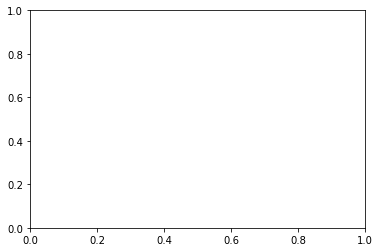

In [18]:
from scipy.stats import norm
abundance = np.array(abundance)
mean,sigma = norm.fit(abundance)
print(mean)
print(sigma)
plt.clf()
plt.hist(abundance, bins=40, normed=True, alpha=0.6, color='g')
#abundance = np.array(abundance) # Unmask array
# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, sigma)
plt.plot(x, p, c='k', linewidth=2)
title = 'Plot of Ba abundance'
plt.title(title)
plt.xlabel('[Ba/Fe] abundance')
plt.ylabel('Relative frequency')
total_err = np.sqrt((preload.star_error_list[index])**2 + sigma**2)
likelihood_factor = norm.pdf(mean,loc=preload.star_abundance_list[index],scale=total_err)
print('Likelihood is ',likelihood_factor)

In [22]:
posterior_function_returning_predictions((positions[0],a))

/home/philcox/anaconda3/lib/python3.6/site-packages/numpy/core/records.py:507: FutureWarning: Numpy has detected that you may be viewing or writing to an array returned by selecting multiple fields in a structured array. 

This code may break in numpy 1.13 because this will return a view instead of a copy -- see release notes for details.
  return obj.view(dtype=(self.dtype.type, obj.dtype))
/home/philcox/Chempy/Chempy/wrapper.py:162: RuntimeWarning: invalid value encountered in subtract
  abundances[element] -= abundances['Fe']
/home/philcox/Chempy/Chempy/data_to_test.py:19: RuntimeWarning: invalid value encountered in true_divide
  exponent = -np.divide((x - x0) * (x - x0),2 * xsig * xsig)


(array([ 0.15442469,  0.15138281,        -inf, -0.09161101,  0.09442199,
        -0.45132715, -0.30514328,  0.13717752,  0.05690796, -0.10300059,
        -0.05999219,  0.36328661,  0.55305382,  0.09538799, -0.81303069,
         0.11067408,  0.07839007,  0.15351252,  0.39168137,  0.3533869 ,
         0.08684451,  0.23099598,  0.07506265,  0.31358037, -0.85450468,
         0.33396087, -0.34160286, -0.23867627,  0.08428053]),
 ['Al',
  'Ar',
  'Ba',
  'C',
  'Ca',
  'Cl',
  'Co',
  'Cr',
  'Cu',
  'F',
  'Fe',
  'Ga',
  'Ge',
  'He',
  'K',
  'Mg',
  'Mn',
  'N',
  'Na',
  'Ne',
  'Ni',
  'O',
  'P',
  'S',
  'Sc',
  'Si',
  'Ti',
  'V',
  'Zn'])

In [46]:
from Chempy.yields import SN1a_feedback,SN2_feedback
basic_1a = SN1a_feedback()
basic_sn2 = SN2_feedback()
getattr(basic_1a,'Seitenzahl')()
getattr(basic_sn2,'chieffi04_net')()
basic_sn2.table

{0.0: array([ ( 13.,  0.09307692,  0.90692308,   3.13076923e-05,  0.00030328,   1.51538462e-09,   7.04345890e-17,  -7.62863740e-25,   2.22307692e-10,  0.00605385,  0.0002939 ,   1.92615385e-06,   2.10769231e-04,   9.40385669e-05,   4.98230769e-05,   3.56923077e-12,  0.00739154,   1.80769231e-07,   4.75613392e-07, -0.15696933,  0.1070315 ,   1.14575846e-06,   1.48528345e-08,   3.19230773e-12,  0.00220751,   2.43076923e-05,   3.26237519e-10,   2.93846153e-09,   1.16153846e-05,   3.95384615e-13,  0.00236935,   1.25392312e-02,  0.01230769,   7.84615385e-06,   3.83846398e-12,  0.00154925,   9.84615385e-08,   9.25388001e-08,  0.00360208,   8.19307692e-11,   1.66884619e-05,   9.69267615e-07,   1.46923076e-14,   8.68853846e-04,   1.20452561e-11),
        ( 15.,  0.098     ,  0.902     ,   5.77333333e-05,  0.00027768,   3.37999994e-15,   1.04039974e-16,  -7.58890180e-25,   9.14219891e-16,  0.00926667,  0.00025939,   1.91733333e-06,   1.42666667e-05,   6.63793415e-05,   2.64000000e-07,   4.66666